Question 2 a)

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Parameters
N = 763
gamma_preset = 0.25

# Initial conditions
S0 = 760
I0 = 3
R0 = 0

# Empiric data
cases = [3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]
days = np.linspace(1, 14, 14)

# SIR model differential equations
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Prepare model for fitting
def beta_fit_SIR_model(t, beta):
    y0 = [S0, I0, R0]
    solution = odeint(SIR_model, y0, t, args=(beta, gamma_preset))
    return solution[:, 1]  # Return the infected (I) values

# Fit beta to the data
beta_fitted = curve_fit(beta_fit_SIR_model, days, cases)[0]

# Generate model values using the best-fit parameters
model_values_beta_fit = beta_fit_SIR_model(days, beta_fitted)

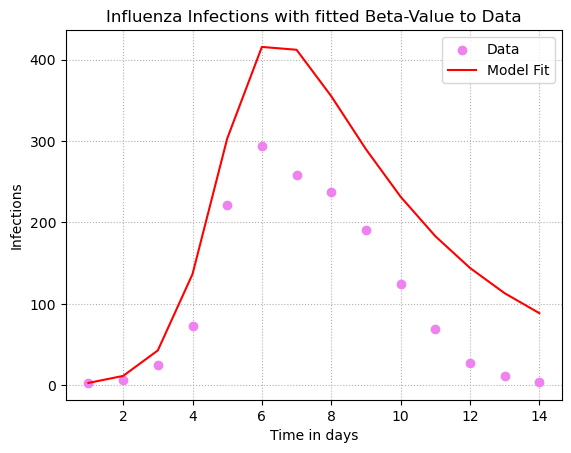

In [2]:
# Plot the results
fig, ax = plt.subplots()
ax.scatter(days, cases, label='Data', color = 'violet')
ax.plot(days, model_values_beta_fit, label='Model Fit', color = 'r')
ax.set(ylabel = 'Infections', xlabel = 'Time in days', title = 'Influenza Infections with fitted Beta-Value to Data')
ax.grid(linestyle = 'dotted')
ax.set_axisbelow(True)
ax.legend()
plt.show()

In [3]:
# Solve the SIR model numerically
y0 = [S0, I0, R0]
solution = odeint(SIR_model, y0, days, args=(beta_fitted, gamma_preset))
S, I, R = solution.T

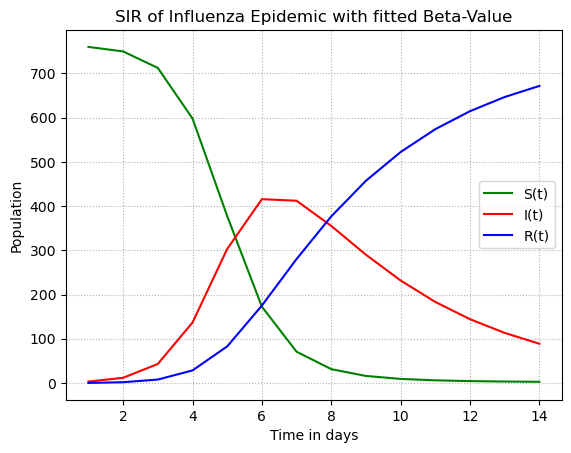

In [4]:
# Plot the results
fig, ax = plt.subplots()
ax.plot(days, S, label='S(t)', color = 'g')
ax.plot(days, I, label='I(t)', color = 'r')
ax.plot(days, R, label='R(t)', color = 'b')
ax.set(ylabel = 'Population', xlabel = 'Time in days', title = 'SIR of Influenza Epidemic with fitted Beta-Value')
ax.grid(linestyle = 'dotted')
ax.set_axisbelow(True)
ax.legend()
plt.show()

Question 2 b)

In [5]:
# Calculate R0 from the estimated values of β and γ
R_0_beta_fit = beta_fitted / gamma_preset
print('The calculated R0-value with fitted beta-value is:', R_0_beta_fit[0])

The calculated R0-value with fitted beta-value is: 6.468752461701508


Question 2 c)

In [6]:
# Prepare model for fitting
def fit_SIR_model(t, beta, gamma):
    y0 = [S0, I0, 0]
    solution = odeint(SIR_model, y0, t, args=(beta, gamma))
    return solution[:, 1]  # Return the infected (I) values

# Fit beta and gamma to the data
beta_gamma_fitted = curve_fit(fit_SIR_model, days, cases, p0=[0.1, 0.1])[0]

# Generate model values using the best-fit parameters
model_values_beta_gamma_fit = fit_SIR_model(days, beta_gamma_fitted[0], beta_gamma_fitted[1])

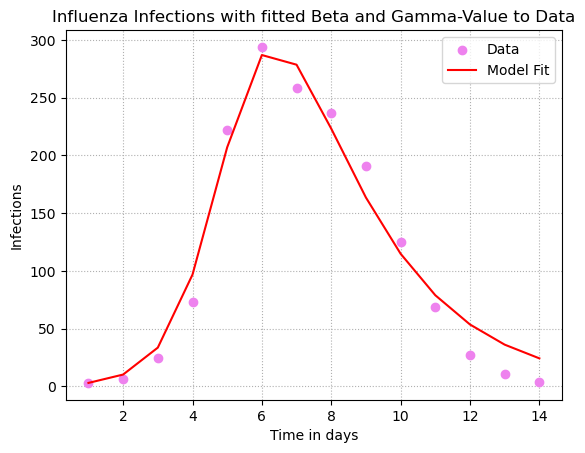

In [7]:
# Plot the results
fig, ax = plt.subplots()
ax.scatter(days, cases, label='Data', color = 'violet')
ax.plot(days, model_values_beta_gamma_fit, label='Model Fit', color = 'r')
ax.set(ylabel = 'Infections', xlabel = 'Time in days', title = 'Influenza Infections with fitted Beta and Gamma-Value to Data')
ax.grid(linestyle = 'dotted')
ax.set_axisbelow(True)
ax.legend()
plt.show()

In [8]:
# Calculate R0 from the estimated values of β and γ
R_0_beta_gamma_fitted = beta_gamma_fitted[0] / beta_gamma_fitted[1]
print('The calculated R0-value with fitted beta and gamma-value is:', R_0_beta_gamma_fitted)

The calculated R0-value with fitted beta and gamma-value is: 3.7742467711564345
